In [1]:
import numpy as np
import pandas as pd
import argparse

## Calculating the Average

In [2]:
from pathlib import Path
import pandas as pd

# Base directory containing project subfolders
base_dir = Path('Revision_Dataset_12samples/')
# Directory to store averaged metrics
avg_dir = base_dir / 'Avg'
avg_dir.mkdir(exist_ok=True)

# Metric filenames (without extension)
metrics = ['peaq_basic', 'peaq_advance', 'visqol', 'haaqi', 'pemo']

# Identify project folders (exclude the Avg folder itself)
projects = [p for p in base_dir.iterdir() if p.is_dir() and p.name != 'Avg']

# Process each metric
for metric in metrics:
    dfs = []
    # Load each project's CSV and set the first column as index
    for proj in projects:
        csv_path = proj / f"{metric}.csv"
        df = pd.read_csv(csv_path)
        df = df.set_index(df.columns[0])  # use first column (e.g., Hum SNR) as index
        dfs.append(df)
    
    # Concatenate and compute mean across projects (averaging numeric columns)
    avg_df = pd.concat(dfs).groupby(level=0).mean().reset_index()

    # Write the averaged dataset
    out_path = avg_dir / f"{metric}.csv"
    avg_df.to_csv(out_path, index=False)
    print(f"Saved average for '{metric}' to: {out_path}")

print("All metrics averaged and saved.")


Saved average for 'peaq_basic' to: Revision_Dataset_12samples/Avg/peaq_basic.csv
Saved average for 'peaq_advance' to: Revision_Dataset_12samples/Avg/peaq_advance.csv
Saved average for 'visqol' to: Revision_Dataset_12samples/Avg/visqol.csv
Saved average for 'haaqi' to: Revision_Dataset_12samples/Avg/haaqi.csv
Saved average for 'pemo' to: Revision_Dataset_12samples/Avg/pemo.csv
All metrics averaged and saved.


## Loading the Dataset_OnlyPaint Avg

In [3]:
Base_Fold = 'Revision_Dataset_12samples'
Project = 'Avg'

## Hum 

In [4]:
df_HN_PEAQ_basic_48k_16bit = pd.read_csv(f'{Base_Fold}/{Project}/peaq_basic.csv',usecols = ['Hum SNR','score'])
df_HN_PEAQ_basic_48k_16bit.columns = ['Hum SNR','score']
df_HN_PEAQ_basic_mp3_48k_16bit = pd.read_csv(f'{Base_Fold}/{Project}/peaq_basic.csv',usecols = ['Hum SNR.1','score.4'])
df_HN_PEAQ_basic_mp3_48k_16bit.columns = ['Hum SNR','score']

df_HN_PEAQ_adv_48k_16bit = pd.read_csv(f'{Base_Fold}/{Project}/peaq_advance.csv',usecols = ['Hum SNR','score'])
df_HN_PEAQ_adv_48k_16bit.columns = ['Hum SNR','score']
df_HN_PEAQ_adv_mp3_48k_16bit = pd.read_csv(f'{Base_Fold}/{Project}/peaq_advance.csv',usecols = ['Hum SNR.1','score.4'])
df_HN_PEAQ_adv_mp3_48k_16bit.columns = ['Hum SNR','score']

df_HN_VISQOL_48k_16bit = pd.read_csv(f'{Base_Fold}/{Project}/visqol.csv',usecols = ['Hum SNR','score'])
df_HN_VISQOL_48k_16bit.columns = ['Hum SNR','score']
df_HN_VISQOL_mp3_48k_16bit = pd.read_csv(f'{Base_Fold}/{Project}/visqol.csv',usecols = ['Hum SNR.1','score.4'])
df_HN_VISQOL_mp3_48k_16bit.columns = ['Hum SNR','score']

df_HN_HAAQI_48k_16bit = pd.read_csv(f'{Base_Fold}/{Project}/haaqi.csv',usecols = ['HumNoise SNR','score'])
df_HN_HAAQI_48k_16bit.columns = ['Hum SNR','score']
df_HN_HAAQI_mp3_48k_16bit = pd.read_csv(f'{Base_Fold}/{Project}/haaqi.csv',usecols = ['HumNoise SNR.1','score.4'])
df_HN_HAAQI_mp3_48k_16bit.columns = ['Hum SNR','score']

df_HN_PEMO_48k_16bit = pd.read_csv(f'{Base_Fold}/{Project}/pemo.csv',usecols = ['Hum SNR','score'])
df_HN_PEMO_48k_16bit.columns = ['Hum SNR','score']
df_HN_PEMO_mp3_48k_16bit = pd.read_csv(f'{Base_Fold}/{Project}/pemo.csv',usecols = ['Hum SNR.1','score.4'])
df_HN_PEMO_mp3_48k_16bit.columns = ['Hum SNR','score']

In [5]:
##Normalize The setting Up
df_HN_PEAQ_basic_48k_16bit["normalised_score"] = (df_HN_PEAQ_basic_48k_16bit['score'] +4 ) / 4
df_HN_PEAQ_basic_mp3_48k_16bit["normalised_score"] = (df_HN_PEAQ_basic_mp3_48k_16bit['score'] +4 ) / 4

df_HN_PEAQ_adv_48k_16bit["normalised_score"] = (df_HN_PEAQ_adv_48k_16bit['score'] +4 ) / 4
df_HN_PEAQ_adv_mp3_48k_16bit["normalised_score"] = (df_HN_PEAQ_adv_mp3_48k_16bit['score'] +4 ) / 4

df_HN_PEMO_48k_16bit["normalised_score"] = (df_HN_PEMO_48k_16bit['score'] +4 ) / 4
df_HN_PEMO_mp3_48k_16bit["normalised_score"] = (df_HN_PEMO_mp3_48k_16bit['score'] +4 ) / 4

df_HN_VISQOL_48k_16bit["normalised_score"] = (df_HN_VISQOL_48k_16bit['score'] +4 ) / 4
df_HN_VISQOL_mp3_48k_16bit["normalised_score"] = (df_HN_VISQOL_mp3_48k_16bit['score'] +4 ) / 4

df_HN_HAAQI_48k_16bit["normalised_score"] = df_HN_HAAQI_48k_16bit['score']
df_HN_HAAQI_mp3_48k_16bit["normalised_score"] = df_HN_HAAQI_mp3_48k_16bit['score']

group_wav = [df_HN_PEAQ_basic_48k_16bit, df_HN_PEAQ_adv_48k_16bit, df_HN_PEMO_48k_16bit, df_HN_VISQOL_48k_16bit, df_HN_HAAQI_48k_16bit]
group_mp3 = [df_HN_PEAQ_basic_mp3_48k_16bit, df_HN_PEAQ_adv_mp3_48k_16bit,df_HN_PEMO_mp3_48k_16bit,df_HN_VISQOL_mp3_48k_16bit, df_HN_HAAQI_mp3_48k_16bit]

### Painting the HUM noise (Double Ref)

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(20, 16), dpi =300,sharex = True)

line_styles = ['-','--',':','-.',(0, (3, 1, 1, 1)),] # Custom: Dash-Dot-Dot
line_width = 2.5  # Set line thickness
metric_type = ['PEAQ_Basic', 'PEAQ_Advance', 'PEMO','VISQOL','HAAQI']

# Plot group1 on the first subplot
for df, label, style in zip(group_wav, metric_type, line_styles):
    ax1.plot(df['Hum SNR'], df['normalised_score'], linestyle=style, label=label, linewidth=12)
ax1.set_title('Reference Audio in Lossless(WAV)',fontsize=36)
ax1.set_xlabel('Signal to Hum Noise Ratio(dB)',fontsize=36)
ax1.set_ylabel('Normalised Score',fontsize=36)
ax1.set_xlim([1, 80])  # Display x-axis values between 1 and 80
ax1.set_ylim([0, 1.1])  # Display y-axis values between 0 and 1.1
ax1.set_yticks([0.2, 0.4, 0.6, 0.8, 1.0])
ax1.tick_params(axis='both', labelsize=36) 
ax1.legend(fontsize=30)
ax1.grid(True,linewidth=3) 

# Plot group2 on the second subplot
for df, label, style in zip(group_mp3, metric_type, line_styles):
    ax2.plot(df['Hum SNR'], df['normalised_score'], linestyle=style, label=label, linewidth=12)
ax2.set_title('Reference Audio in Lossy(MP3)',fontsize=36)
ax2.set_xlabel('Signal to Hum Noise Ratio(dB)',fontsize=36)
ax2.set_ylabel('Normalised Score',fontsize=36)
ax2.set_xlim([1, 80])  # Display x-axis values between 20 and 80
ax2.set_ylim([0, 1.1])  # Display y-axis values between -0.5 and 0.5
ax2.set_yticks([0.2, 0.4, 0.6, 0.8, 1.0])
ax2.tick_params(axis='both', labelsize=36) 
ax2.legend(fontsize=30)
ax2.grid(True,linewidth=3)

# Adjust layout and show the plot
plt.tight_layout()
plt.show()

### Painting the HUM noise (Only Mp3 Ref)

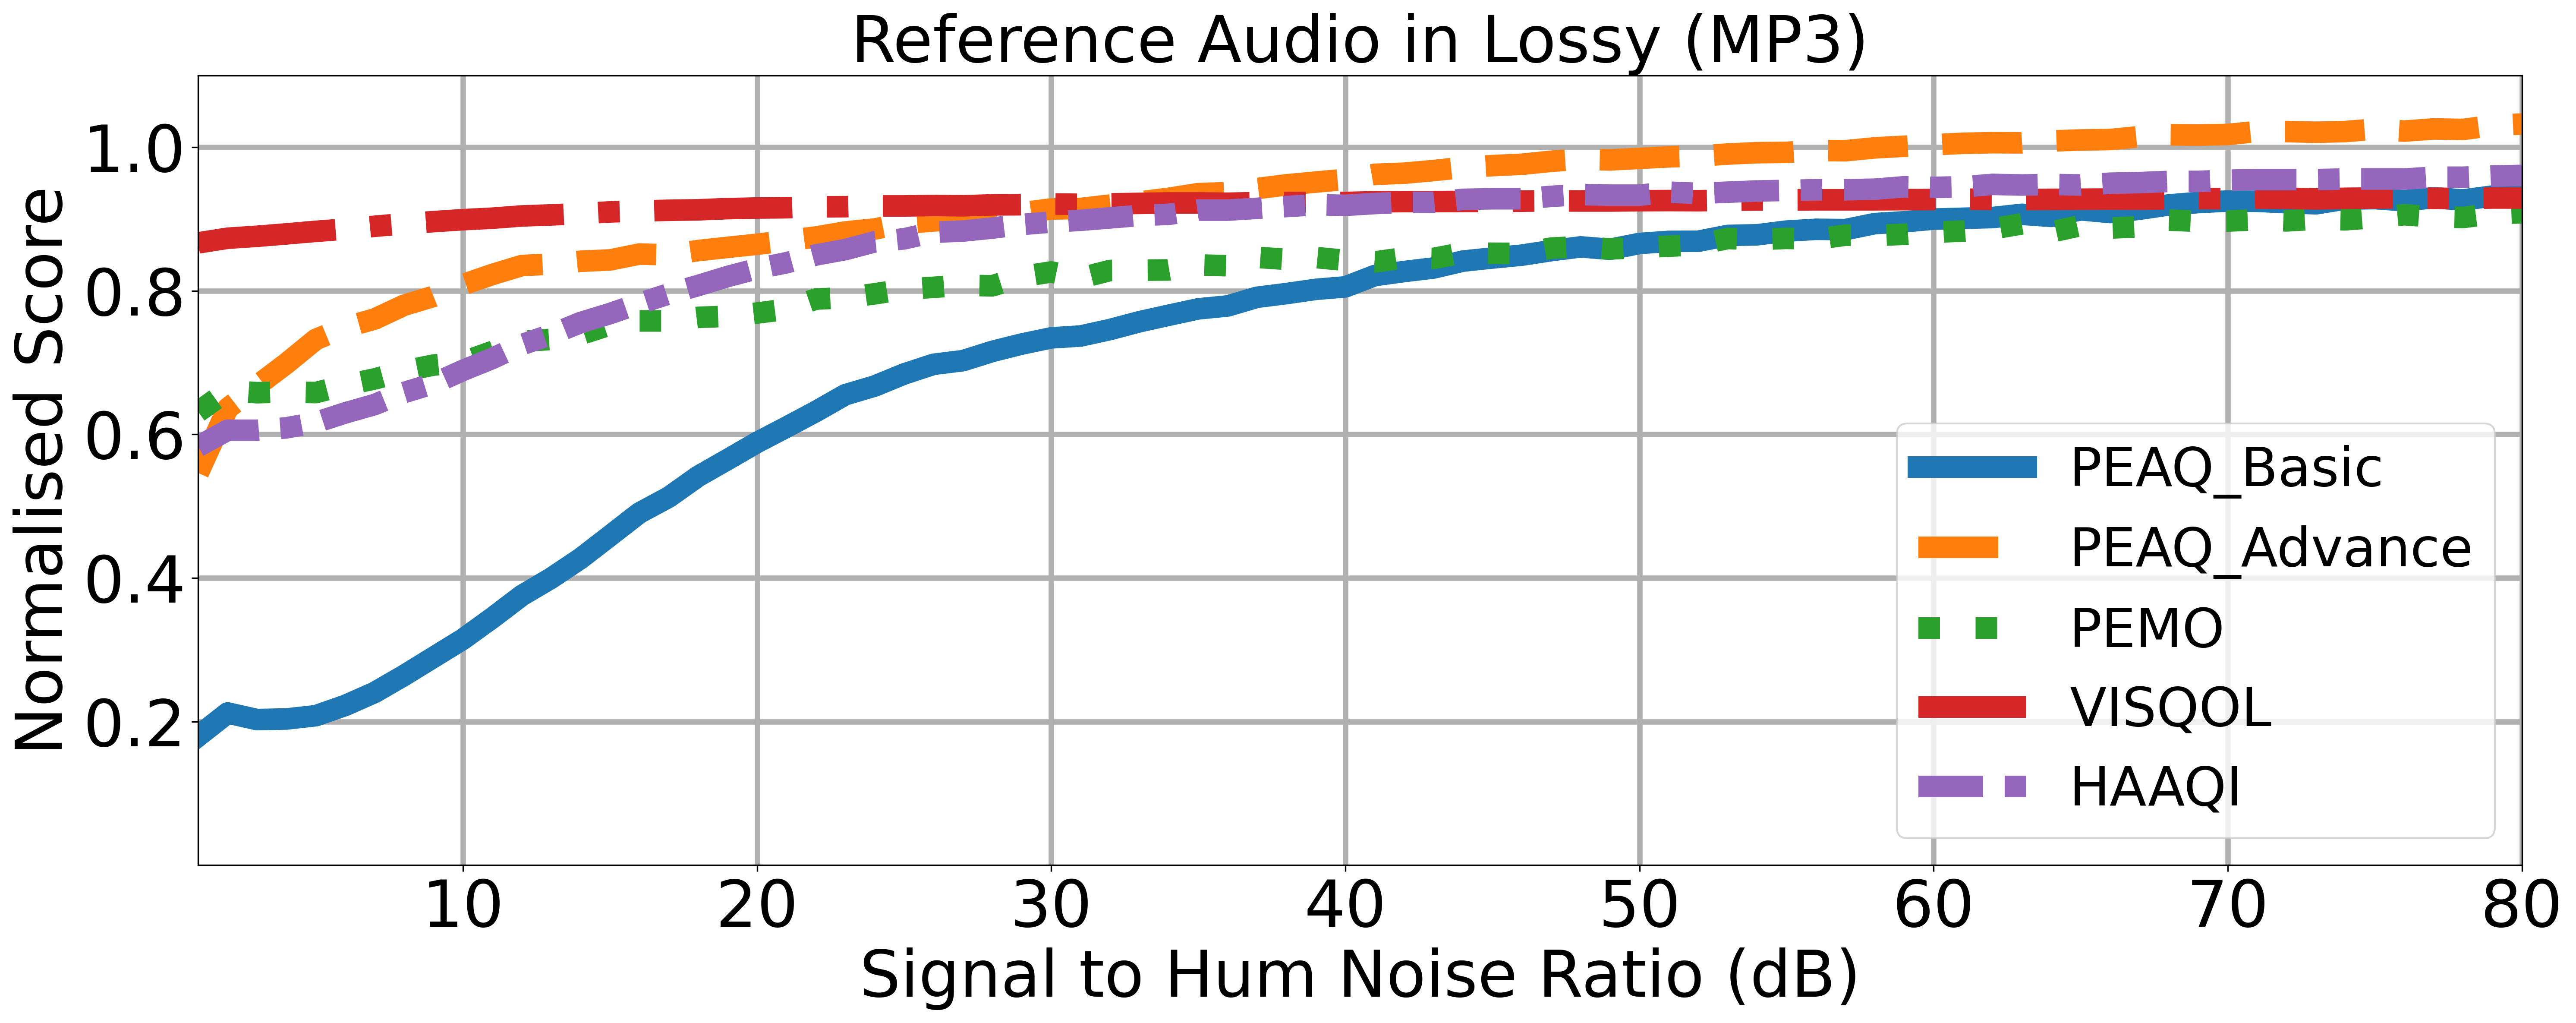

In [10]:
import matplotlib.pyplot as plt

# Assuming you already have:
#   group_mp3    – list of DataFrames for PEAQ Basic, PEAQ Advance, PEMO, ViSQOL, HAAQI (MP3)
#   metric_type  – ['PEAQ_Basic', 'PEAQ_Advance', 'PEMO', 'VISQOL', 'HAAQI']
#   line_styles  – ['-','--',':','-.',(0,(3,1,1,1))]

fig, ax = plt.subplots(figsize=(20, 8), dpi=300)

for df, label, style in zip(group_mp3, metric_type, line_styles):
    ax.plot(df['Hum SNR'],
            df['normalised_score'],
            linestyle=style,
            label=label,
            linewidth=12)

ax.set_title('Reference Audio in Lossy (MP3)', fontsize=36)
ax.set_xlabel('Signal to Hum Noise Ratio (dB)', fontsize=36)
ax.set_ylabel('Normalised Score', fontsize=36)
ax.set_xlim(1, 80)
ax.set_ylim(0, 1.1)
ax.set_yticks([0.2, 0.4, 0.6, 0.8, 1.0])
ax.tick_params(axis='both', labelsize=36)
ax.legend(fontsize=30)
ax.grid(True, linewidth=3)

plt.tight_layout()
plt.show()


## White Noise

### Loading Data

In [11]:
df_WN_PEAQ_basic_48k_16bit = pd.read_csv(f'{Base_Fold}/{Project}/peaq_basic.csv',usecols = ['WhiteNoise SNR','score.1'])
df_WN_PEAQ_basic_48k_16bit.columns = ['WhiteNoise SNR','score']
df_WN_PEAQ_basic_mp3_48k_16bit = pd.read_csv(f'{Base_Fold}/{Project}/peaq_basic.csv',usecols = ['WhiteNoise SNR.1','score.5'])
df_WN_PEAQ_basic_mp3_48k_16bit.columns = ['WhiteNoise SNR','score']

df_WN_PEAQ_adv_48k_16bit = pd.read_csv(f'{Base_Fold}/{Project}/peaq_advance.csv',usecols = ['WhiteNoise SNR','score.1'])
df_WN_PEAQ_adv_48k_16bit.columns = ['WhiteNoise SNR','score']
df_WN_PEAQ_adv_mp3_48k_16bit = pd.read_csv(f'{Base_Fold}/{Project}/peaq_advance.csv',usecols = ['WhiteNoise SNR.1','score.5'])
df_WN_PEAQ_adv_mp3_48k_16bit.columns = ['WhiteNoise SNR','score']

df_WN_VISQOL_48k_16bit = pd.read_csv(f'{Base_Fold}/{Project}/visqol.csv',usecols = ['WhiteNoise SNR','score.1'])
df_WN_VISQOL_48k_16bit.columns = ['WhiteNoise SNR','score']
df_WN_VISQOL_mp3_48k_16bit = pd.read_csv(f'Revision_Dataset/{Project}/visqol.csv',usecols = ['WhiteNoise SNR.1','score.5'])
df_WN_VISQOL_mp3_48k_16bit.columns = ['WhiteNoise SNR','score']

df_WN_HAAQI_48k_16bit = pd.read_csv(f'{Base_Fold}/{Project}/haaqi.csv',usecols = ['WhiteNoise SNR','score.1'])
df_WN_HAAQI_48k_16bit.columns = ['WhiteNoise SNR','score']
df_WN_HAAQI_mp3_48k_16bit = pd.read_csv(f'{Base_Fold}/{Project}/haaqi.csv',usecols = ['WhiteNoise SNR.1','score.5'])
df_WN_HAAQI_mp3_48k_16bit.columns = ['WhiteNoise SNR','score']

df_WN_PEMO_48k_16bit = pd.read_csv(f'{Base_Fold}/{Project}/pemo.csv',usecols = ['WhiteNoise SNR','score.1'])
df_WN_PEMO_48k_16bit.columns = ['WhiteNoise SNR','score']
df_WN_PEMO_mp3_48k_16bit = pd.read_csv(f'{Base_Fold}/{Project}/pemo.csv',usecols = ['WhiteNoise SNR.1','score.5'])
df_WN_PEMO_mp3_48k_16bit.columns = ['WhiteNoise SNR','score']

In [12]:
##Normalize The setting Up
df_WN_PEAQ_basic_48k_16bit["normalised_score"] = (df_WN_PEAQ_basic_48k_16bit['score'] +4 ) / 4
df_WN_PEAQ_basic_mp3_48k_16bit["normalised_score"] = (df_WN_PEAQ_basic_mp3_48k_16bit['score'] +4 ) / 4

df_WN_PEAQ_adv_48k_16bit["normalised_score"] = (df_WN_PEAQ_adv_48k_16bit['score'] +4 ) / 4
df_WN_PEAQ_adv_mp3_48k_16bit["normalised_score"] = (df_WN_PEAQ_adv_mp3_48k_16bit['score'] +4 ) / 4

df_WN_PEMO_48k_16bit["normalised_score"] = (df_WN_PEMO_48k_16bit['score'] +4 ) / 4
df_WN_PEMO_mp3_48k_16bit["normalised_score"] = (df_WN_PEMO_mp3_48k_16bit['score'] +4 ) / 4

df_WN_VISQOL_48k_16bit["normalised_score"] = (df_WN_VISQOL_48k_16bit['score'] +4 ) / 4
df_WN_VISQOL_mp3_48k_16bit["normalised_score"] = (df_WN_VISQOL_mp3_48k_16bit['score'] +4 ) / 4

df_WN_HAAQI_48k_16bit["normalised_score"] = df_WN_HAAQI_48k_16bit['score']
df_WN_HAAQI_mp3_48k_16bit["normalised_score"] = df_WN_HAAQI_mp3_48k_16bit['score']

In [13]:
group_wav = [df_WN_PEAQ_basic_48k_16bit, df_WN_PEAQ_adv_48k_16bit, df_WN_PEMO_48k_16bit, df_WN_VISQOL_48k_16bit, df_WN_HAAQI_48k_16bit]
group_mp3 = [df_WN_PEAQ_basic_mp3_48k_16bit, df_WN_PEAQ_adv_mp3_48k_16bit, df_WN_PEMO_mp3_48k_16bit, df_WN_VISQOL_mp3_48k_16bit, df_WN_HAAQI_mp3_48k_16bit, ]

### Painting the White noise(Both Ref)

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(20, 16), dpi = 300,sharex = True)

line_styles = ['-','--',':','-.',(0, (3, 1, 1, 1)),] # Custom: Dash-Dot-Dot
line_width = 2.5  # Set line thickness
metric_type = ['PEAQ_Basic', 'PEAQ_Advance', 'PEMO','VISQOL','HAAQI']

# Plot group1 on the first subplot
for df, label, style in zip(group_wav, metric_type, line_styles):
    ax1.plot(df['WhiteNoise SNR'], df['normalised_score'], linestyle=style, label=label, linewidth=12)
ax1.set_title('Reference Audio in Lossless(WAV)',fontsize=36)
ax1.set_xlabel('Signal to White Noise Ratio(dB)',fontsize=36)
ax1.set_ylabel('Normalised Score',fontsize=36)
ax1.set_xlim([1, 80])  # Display x-axis values between 1 and 80
ax1.set_ylim([0, 1.1])  # Display y-axis values between 0 and 1.1
ax1.set_yticks([0.2, 0.4, 0.6, 0.8, 1.0])
ax1.tick_params(axis='both', labelsize=36) 
ax1.legend(fontsize=30)
ax1.grid(True,linewidth=3) 

# Plot group2 on the second subplot
for df, label, style in zip(group_mp3, metric_type, line_styles):
    ax2.plot(df['WhiteNoise SNR'], df['normalised_score'], linestyle=style, label=label, linewidth=12)
ax2.set_title('Reference Audio in Lossy(MP3)',fontsize=36)
ax2.set_xlabel('Signal to White Noise Ratio(dB)',fontsize=36)
ax2.set_ylabel('Normalised Score',fontsize=36)
ax2.set_xlim([1, 80])  # Display x-axis values between 20 and 80
ax2.set_ylim([0, 1.1])  # Display y-axis values between -0.5 and 0.5
ax2.set_yticks([0.2, 0.4, 0.6, 0.8, 1.0])
ax2.tick_params(axis='both', labelsize=36) 
ax2.legend(fontsize=30)
ax2.grid(True,linewidth=3)

# Adjust layout and show the plot
plt.tight_layout()
plt.show()

### Painting the White noise(Single Mp3 Ref)

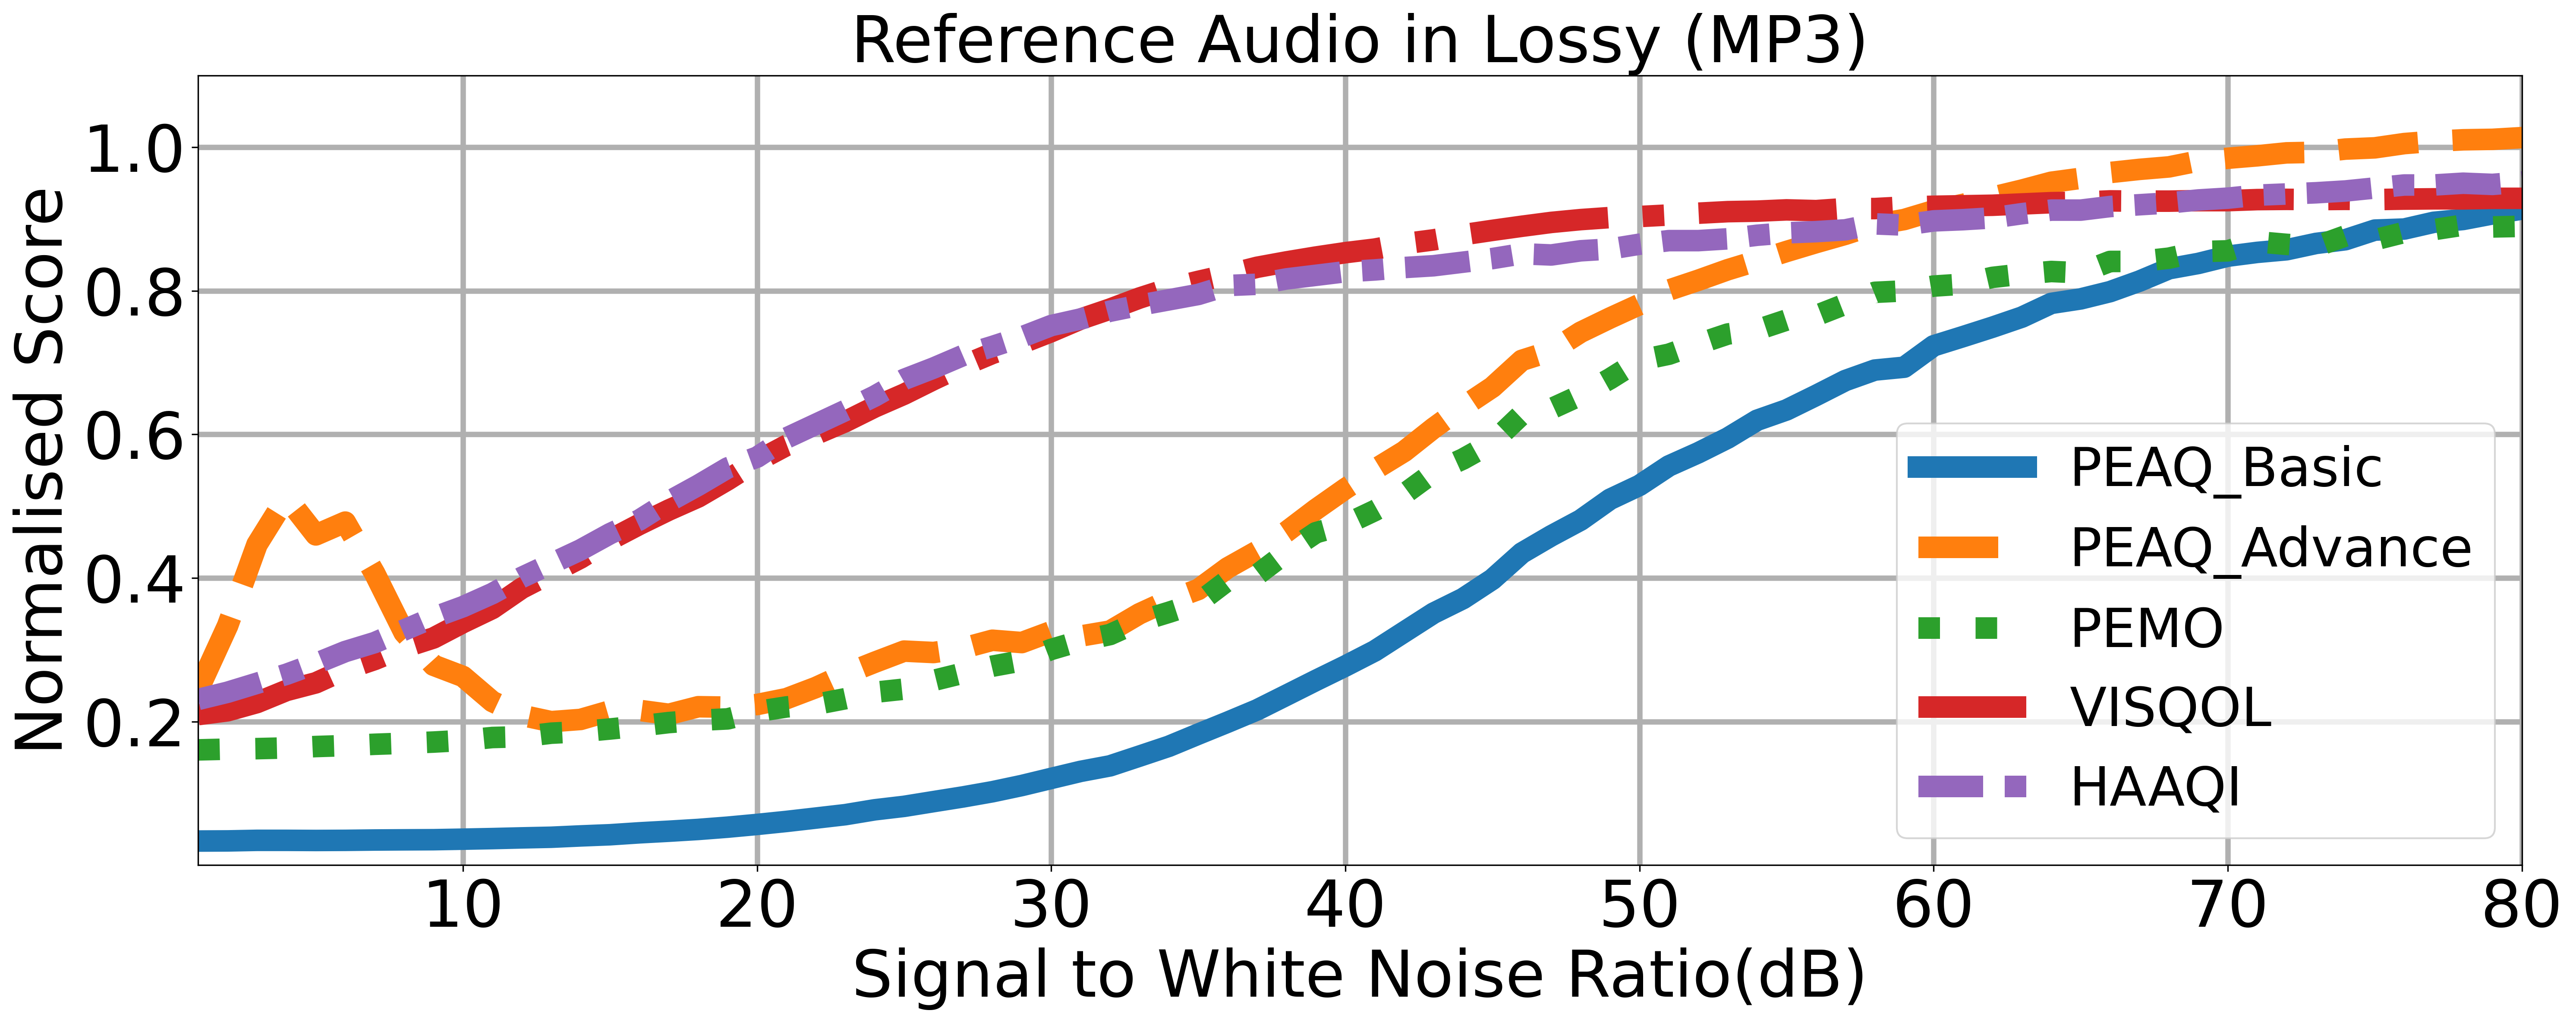

In [14]:
import matplotlib.pyplot as plt

# Assuming you already have:
#   group_mp3    – list of DataFrames for PEAQ Basic, PEAQ Advance, PEMO, ViSQOL, HAAQI (MP3)
#   metric_type  – ['PEAQ_Basic', 'PEAQ_Advance', 'PEMO', 'VISQOL', 'HAAQI']
#   line_styles  – ['-','--',':','-.',(0,(3,1,1,1))]

fig, ax = plt.subplots(figsize=(20, 8), dpi=300)

for df, label, style in zip(group_mp3, metric_type, line_styles):
    ax.plot(df['WhiteNoise SNR'],
            df['normalised_score'],
            linestyle=style,
            label=label,
            linewidth=12)

ax.set_title('Reference Audio in Lossy (MP3)', fontsize=36)
ax.set_xlabel('Signal to White Noise Ratio(dB)', fontsize=36)
ax.set_ylabel('Normalised Score', fontsize=36)
ax.set_xlim(1, 80)
ax.set_ylim(0, 1.1)
ax.set_yticks([0.2, 0.4, 0.6, 0.8, 1.0])
ax.tick_params(axis='both', labelsize=36)
ax.legend(fontsize=30)
ax.grid(True, linewidth=3)

plt.tight_layout()
plt.show()


## Clipping Percentage

In [15]:
##PEAQ Basic
df_CP_PEAQ_basic_48k_16bit = pd.read_csv(f'{Base_Fold}/{Project}/peaq_basic.csv',usecols = ['Clipping Percentage(%)','score.2'])
df_CP_PEAQ_basic_48k_16bit.columns = ['Clipping Percentage','score']
df_CP_PEAQ_basic_mp3_48k_16bit = pd.read_csv(f'{Base_Fold}/{Project}/peaq_basic.csv',usecols = ['Clipping Percentage(%).1','score.6'])
df_CP_PEAQ_basic_mp3_48k_16bit.columns = ['Clipping Percentage','score']

df_CP_PEAQ_adv_48k_16bit = pd.read_csv(f'{Base_Fold}/{Project}/peaq_advance.csv',usecols = ['Clipping Percentage(%)','score.2'])
df_CP_PEAQ_adv_48k_16bit.columns = ['Clipping Percentage','score']
df_CP_PEAQ_adv_mp3_48k_16bit = pd.read_csv(f'Revision_Dataset/{Project}/peaq_advance.csv',usecols = ['Clipping Percentage(%).1','score.6'])
df_CP_PEAQ_adv_mp3_48k_16bit.columns = ['Clipping Percentage','score']

df_CP_VISQOL_48k_16bit = pd.read_csv(f'{Base_Fold}/{Project}/visqol.csv',usecols = ['Clipping Percentage(%)','score.2'])
df_CP_VISQOL_48k_16bit.columns = ['Clipping Percentage','score']
df_CP_VISQOL_mp3_48k_16bit = pd.read_csv(f'{Base_Fold}/{Project}/visqol.csv',usecols = ['Clipping Percentage(%).1','score.6'])
df_CP_VISQOL_mp3_48k_16bit.columns = ['Clipping Percentage','score']

df_CP_HAAQI_48k_16bit = pd.read_csv(f'{Base_Fold}/{Project}/haaqi.csv',usecols = ['Clipping Percentage(%)','score.2'])
df_CP_HAAQI_48k_16bit.columns = ['Clipping Percentage','score']
df_CP_HAAQI_mp3_48k_16bit = pd.read_csv(f'{Base_Fold}/{Project}/haaqi.csv',usecols = ['Clipping Percentage(%).1','score.6'])
df_CP_HAAQI_mp3_48k_16bit.columns = ['Clipping Percentage','score']

df_CP_PEMO_48k_16bit = pd.read_csv(f'{Base_Fold}/{Project}/pemo.csv',usecols = ['Clipping Percentage','score.2'])
df_CP_PEMO_48k_16bit.columns = ['Clipping Percentage','score']
df_CP_PEMO_mp3_48k_16bit = pd.read_csv(f'{Base_Fold}/{Project}/pemo.csv',usecols = ['Clipping Percentage.1','score.6'])
df_CP_PEMO_mp3_48k_16bit.columns = ['Clipping Percentage','score']

In [16]:
##Normalize The setting Up
df_CP_PEAQ_basic_48k_16bit["normalised_score"] = (df_CP_PEAQ_basic_48k_16bit['score'] +4 ) / 4
df_CP_PEAQ_basic_mp3_48k_16bit["normalised_score"] = (df_CP_PEAQ_basic_mp3_48k_16bit['score'] +4 ) / 4

df_CP_PEAQ_adv_48k_16bit["normalised_score"] = (df_CP_PEAQ_adv_48k_16bit['score'] +4 ) / 4
df_CP_PEAQ_adv_mp3_48k_16bit["normalised_score"] = (df_CP_PEAQ_adv_mp3_48k_16bit['score'] +4 ) / 4

df_CP_PEMO_48k_16bit["normalised_score"] = (df_CP_PEMO_48k_16bit['score'] +4 ) / 4
df_CP_PEMO_mp3_48k_16bit["normalised_score"] = (df_CP_PEMO_mp3_48k_16bit['score'] +4 ) / 4

df_CP_VISQOL_48k_16bit["normalised_score"] = (df_CP_VISQOL_48k_16bit['score'] +4 ) / 4
df_CP_VISQOL_mp3_48k_16bit["normalised_score"] = (df_CP_VISQOL_mp3_48k_16bit['score'] +4 ) / 4

df_CP_HAAQI_48k_16bit["normalised_score"] = df_CP_HAAQI_48k_16bit['score']
df_CP_HAAQI_mp3_48k_16bit["normalised_score"] = df_CP_HAAQI_mp3_48k_16bit['score']

group_wav = [df_CP_PEAQ_basic_48k_16bit, df_CP_PEAQ_adv_48k_16bit,df_CP_PEMO_48k_16bit, df_CP_VISQOL_48k_16bit, df_CP_HAAQI_48k_16bit, ]
group_mp3 = [df_CP_PEAQ_basic_mp3_48k_16bit, df_CP_PEAQ_adv_mp3_48k_16bit, df_CP_PEMO_mp3_48k_16bit, df_CP_VISQOL_mp3_48k_16bit, df_CP_HAAQI_mp3_48k_16bit, ]

### Painting the Clipping Noise (both ref)

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd


fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(20, 16), dpi = 300,sharex = True)
line_styles = ['-','--',':','-.',(0, (3, 1, 1, 1)),] # Custom: Dash-Dot-Dot
line_width = 2.5  # Set line thickness
metric_type = ['PEAQ_Basic', 'PEAQ_Advance', 'PEMO','VISQOL','HAAQI']

# Plot group1 on the first subplot
for df, label, style in zip(group_wav, metric_type, line_styles):
    ax1.plot(df['Clipping Percentage'], df['normalised_score'], linestyle=style, label=label, linewidth=12)
ax1.set_title('Reference Audio in Lossless(WAV)',fontsize=36)
ax1.set_xlabel('Clipping Percentage(%)',fontsize=36)
ax1.set_ylabel('Normalised Score',fontsize=36)
ax1.set_xlim([1, 100])  # Display x-axis values between 1 and 80
ax1.set_ylim([0, 1.1])  # Display y-axis values between 0 and 1.1
ax1.set_yticks([0.2, 0.4, 0.6, 0.8, 1.0])
ax1.tick_params(axis='both', labelsize=36) 
ax1.legend(fontsize=30)
ax1.grid(True,linewidth=3) 

# Plot group2 on the second subplot
for df, label, style in zip(group_mp3, metric_type, line_styles):
    ax2.plot(df['Clipping Percentage'], df['normalised_score'], linestyle=style, label=label, linewidth=12)
ax2.set_title('Reference Audio in Lossy(MP3)',fontsize=36)
ax2.set_xlabel('Clipping Percentage(%)',fontsize=36)
ax2.set_ylabel('Normalised Score',fontsize=36)
ax2.set_xlim([1, 100])  # Display x-axis values between 20 and 80
ax2.set_ylim([0, 1.1])  # Display y-axis values between -0.5 and 0.5
ax2.set_yticks([0.2, 0.4, 0.6, 0.8, 1.0])
ax2.tick_params(axis='both', labelsize=36) 
ax2.legend(fontsize=30)
ax2.grid(True,linewidth=3)

# Adjust layout and show the plot
plt.tight_layout()
plt.show()

### Painting the Clipping Noise (single mp3 ref)

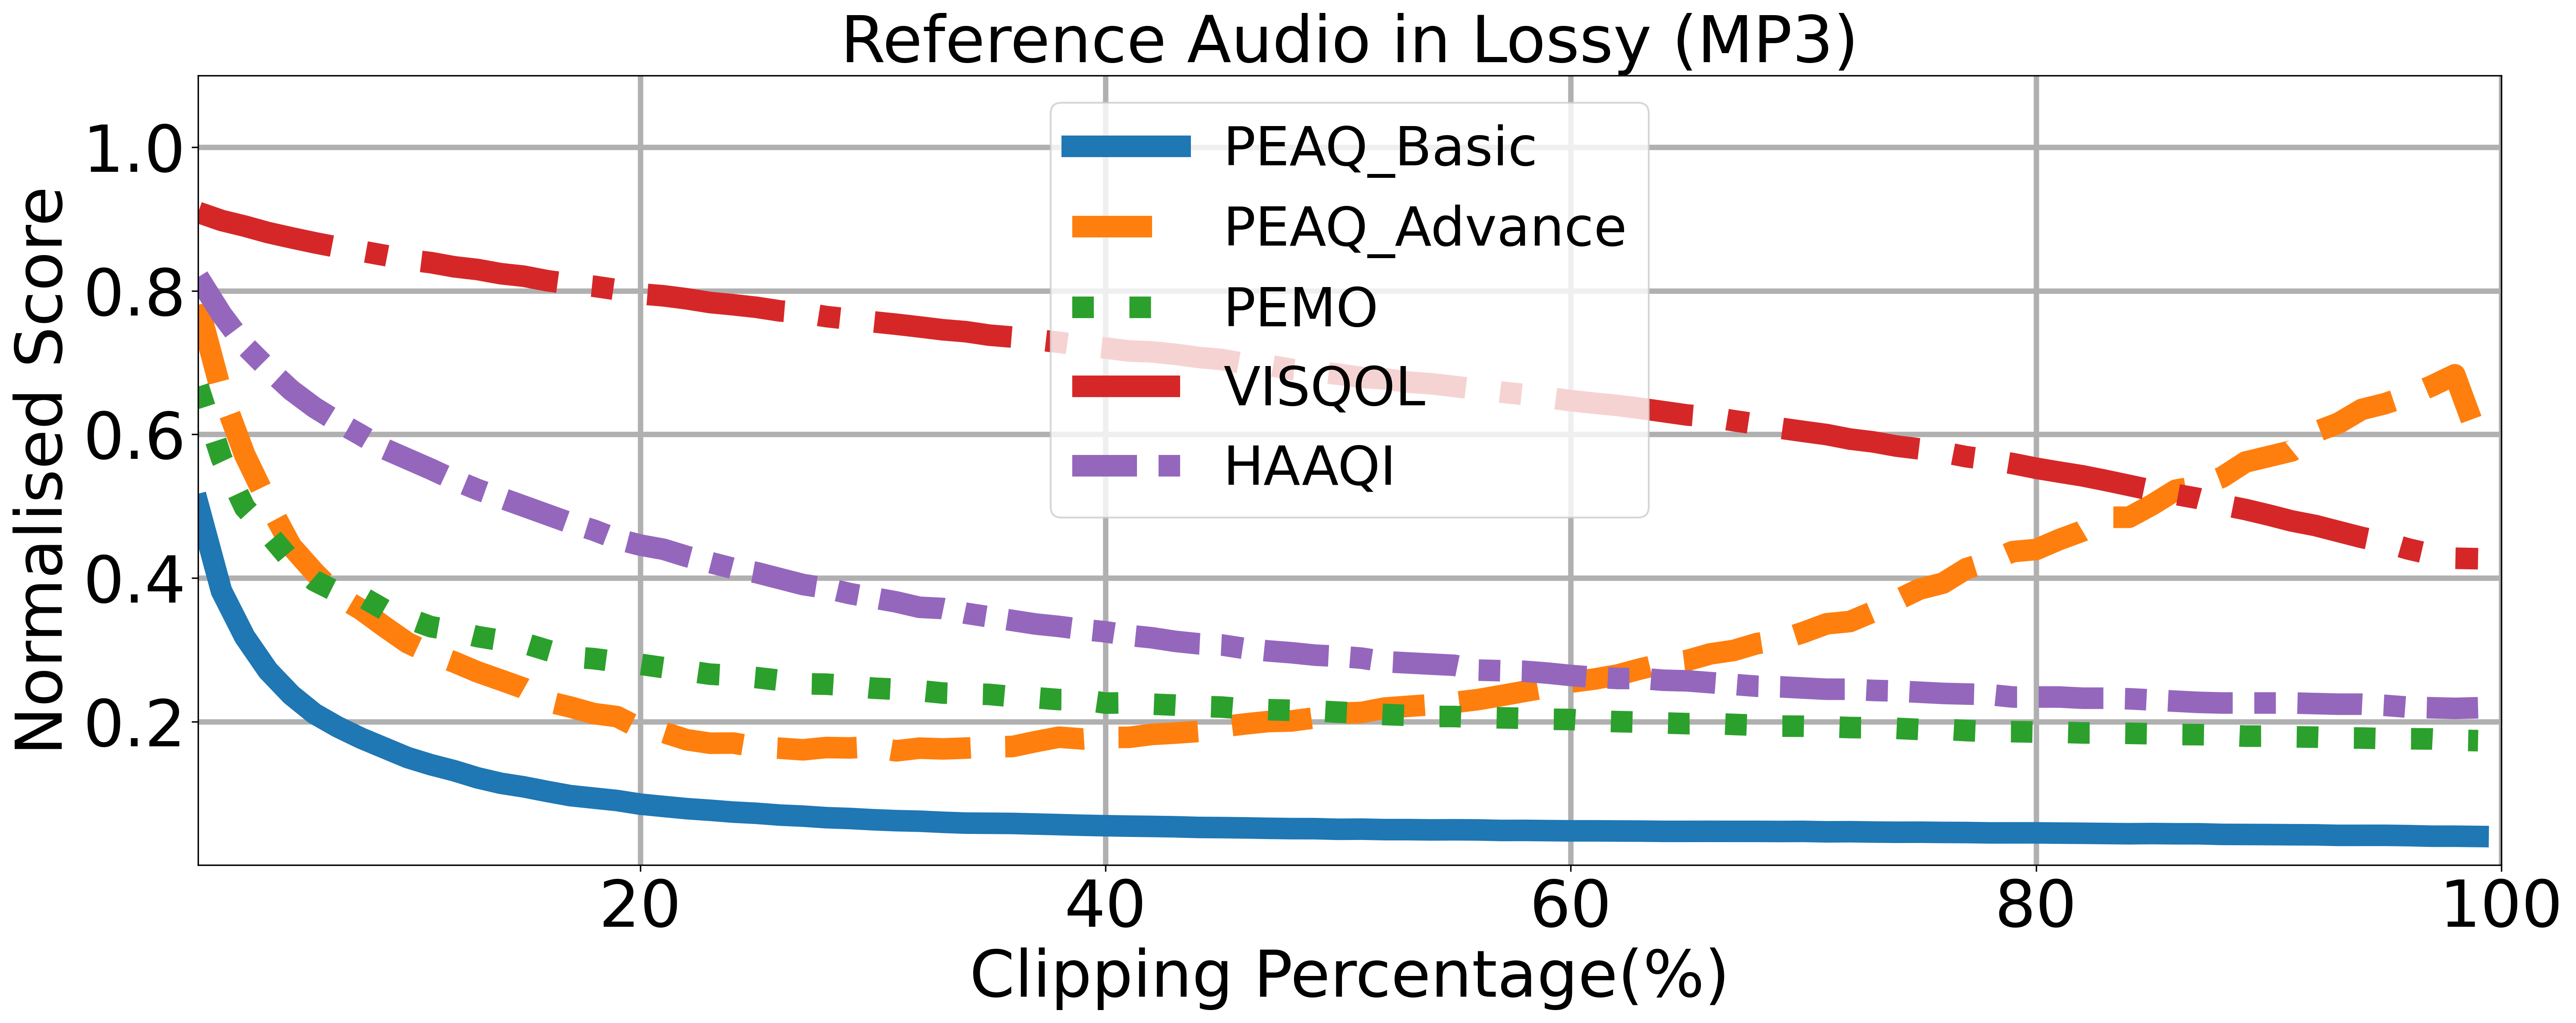

In [17]:
import matplotlib.pyplot as plt

# Assuming you already have:
#   group_mp3    – list of DataFrames for PEAQ Basic, PEAQ Advance, PEMO, ViSQOL, HAAQI (MP3)
#   metric_type  – ['PEAQ_Basic', 'PEAQ_Advance', 'PEMO', 'VISQOL', 'HAAQI']
#   line_styles  – ['-','--',':','-.',(0,(3,1,1,1))]

fig, ax = plt.subplots(figsize=(20, 8), dpi=300)

for df, label, style in zip(group_mp3, metric_type, line_styles):
    ax.plot(df['Clipping Percentage'],
            df['normalised_score'],
            linestyle=style,
            label=label,
            linewidth=12)

ax.set_title('Reference Audio in Lossy (MP3)', fontsize=36)
ax.set_xlabel('Clipping Percentage(%)', fontsize=36)
ax.set_ylabel('Normalised Score', fontsize=36)
ax.set_xlim(1, 100)
ax.set_ylim(0, 1.1)
ax.set_yticks([0.2, 0.4, 0.6, 0.8, 1.0])
ax.tick_params(axis='both', labelsize=36)
ax.legend(fontsize=30)
ax.grid(True, linewidth=3)

plt.tight_layout()
plt.show()


## Drop Out

In [18]:
##PEAQ Basic
df_DO_PEAQ_basic_48k_16bit = pd.read_csv(f'{Base_Fold}/{Project}/peaq_basic.csv',usecols = ['Dropout Num','score.3'])
df_DO_PEAQ_basic_48k_16bit.columns = ['Dropout Num','score']
df_DO_PEAQ_basic_mp3_48k_16bit = pd.read_csv(f'{Base_Fold}/{Project}/peaq_basic.csv',usecols = ['Dropout Num.1','score.7'])
df_DO_PEAQ_basic_mp3_48k_16bit.columns = ['Dropout Num','score']

df_DO_PEAQ_adv_48k_16bit = pd.read_csv(f'{Base_Fold}/{Project}/peaq_advance.csv',usecols = ['Dropout Num','score.3'])
df_DO_PEAQ_adv_48k_16bit.columns = ['Dropout Num','score']
df_DO_PEAQ_adv_mp3_48k_16bit = pd.read_csv(f'{Base_Fold}/{Project}/peaq_advance.csv',usecols = ['Dropout Num.1','score.7'])
df_DO_PEAQ_adv_mp3_48k_16bit.columns = ['Dropout Num','score']

df_DO_VISQOL_48k_16bit = pd.read_csv(f'{Base_Fold}/{Project}/visqol.csv',usecols = ['Dropout Num','score.3'])
df_DO_VISQOL_48k_16bit.columns = ['Dropout Num','score']
df_DO_VISQOL_mp3_48k_16bit = pd.read_csv(f'{Base_Fold}/{Project}/visqol.csv',usecols = ['Dropout Num.1','score.7'])
df_DO_VISQOL_mp3_48k_16bit.columns = ['Dropout Num','score']

df_DO_HAAQI_48k_16bit = pd.read_csv(f'{Base_Fold}/{Project}/haaqi.csv',usecols = ['Dropout Num','score.3'])
df_DO_HAAQI_48k_16bit.columns = ['Dropout Num','score']
df_DO_HAAQI_mp3_48k_16bit = pd.read_csv(f'{Base_Fold}/{Project}/haaqi.csv',usecols = ['Dropout Num.1','score.7'])
df_DO_HAAQI_mp3_48k_16bit.columns = ['Dropout Num','score']

df_DO_PEMO_48k_16bit = pd.read_csv(f'{Base_Fold}/{Project}/pemo.csv',usecols = ['Dropout Num','score.3'])
df_DO_PEMO_48k_16bit.columns = ['Dropout Num','score']
df_DO_PEMO_mp3_48k_16bit = pd.read_csv(f'{Base_Fold}/{Project}/pemo.csv',usecols = ['Dropout Num.1','score.7'])
df_DO_PEMO_mp3_48k_16bit.columns = ['Dropout Num','score']

In [19]:
##Normalize The setting Up
df_DO_PEAQ_basic_48k_16bit["normalised_score"] = (df_DO_PEAQ_basic_48k_16bit['score'] +4 ) / 4
df_DO_PEAQ_basic_mp3_48k_16bit["normalised_score"] = (df_DO_PEAQ_basic_mp3_48k_16bit['score'] +4 ) / 4

df_DO_PEAQ_adv_48k_16bit["normalised_score"] = (df_DO_PEAQ_adv_48k_16bit['score'] +4 ) / 4
df_DO_PEAQ_adv_mp3_48k_16bit["normalised_score"] = (df_DO_PEAQ_adv_mp3_48k_16bit['score'] +4 ) / 4

df_DO_PEMO_48k_16bit["normalised_score"] = (df_DO_PEMO_48k_16bit['score'] +4 ) / 4
df_DO_PEMO_mp3_48k_16bit["normalised_score"] = (df_DO_PEMO_mp3_48k_16bit['score'] +4 ) / 4

df_DO_VISQOL_48k_16bit["normalised_score"] = (df_DO_VISQOL_48k_16bit['score'] +4 ) / 4
df_DO_VISQOL_mp3_48k_16bit["normalised_score"] = (df_DO_VISQOL_mp3_48k_16bit['score'] +4 ) / 4

df_DO_HAAQI_48k_16bit["normalised_score"] = df_DO_HAAQI_48k_16bit['score']
df_DO_HAAQI_mp3_48k_16bit["normalised_score"] = df_DO_HAAQI_mp3_48k_16bit['score']

In [20]:
group_wav = [df_DO_PEAQ_basic_48k_16bit, df_DO_PEAQ_adv_48k_16bit, df_DO_PEMO_48k_16bit, df_DO_VISQOL_48k_16bit, df_DO_HAAQI_48k_16bit]
group_mp3 = [df_DO_PEAQ_basic_mp3_48k_16bit, df_DO_PEAQ_adv_mp3_48k_16bit,df_DO_PEMO_mp3_48k_16bit,df_DO_VISQOL_mp3_48k_16bit, df_DO_HAAQI_mp3_48k_16bit]

### Painting the Dropout number (Both Ref)

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(20, 16), dpi = 300,sharex = True)

line_styles = ['-','--',':','-.',(0, (3, 1, 1, 1)),] # Custom: Dash-Dot-Dot
line_width = 2.5  # Set line thickness
metric_type = ['PEAQ_Basic', 'PEAQ_Advance', 'PEMO','VISQOL','HAAQI']

# Plot group1 on the first subplot
for df, label, style in zip(group_wav, metric_type, line_styles):
    ax1.plot(df['Dropout Num'], df['normalised_score'], linestyle=style, label=label, linewidth=12)
ax1.set_title('Reference Audio in Lossless(WAV)',fontsize=36)
ax1.set_xlabel('Glitch Occurences',fontsize=36)
ax1.set_ylabel('Normalised Score',fontsize=36)
ax1.set_xlim([1, 80])  # Display x-axis values between 1 and 80
ax1.set_ylim([0, 1.1])  # Display y-axis values between 0 and 1.1
ax1.set_yticks([0.2, 0.4, 0.6, 0.8, 1.0])
ax1.tick_params(axis='both', labelsize=36) 
ax1.legend(fontsize=30)
ax1.grid(True,linewidth=3) 

# Plot group2 on the second subplot
for df, label, style in zip(group_mp3, metric_type, line_styles):
    ax2.plot(df['Dropout Num'], df['normalised_score'], linestyle=style, label=label, linewidth=12)
ax2.set_title('Reference Audio in Lossy(MP3)',fontsize=36)
ax2.set_xlabel('Glitch Occurences',fontsize=36)
ax2.set_ylabel('Normalised Score',fontsize=36)
ax2.set_xlim([1, 80])  # Display x-axis values between 20 and 80
ax2.set_ylim([0, 1.1])  # Display y-axis values between -0.5 and 0.5
ax2.set_yticks([0.2, 0.4, 0.6, 0.8, 1.0])
ax2.tick_params(axis='both', labelsize=36) 
ax2.legend(fontsize=30)
ax2.grid(True,linewidth=3)

# Adjust layout and show the plot
plt.tight_layout()
plt.show()

### Single mp3 Ref Painting 

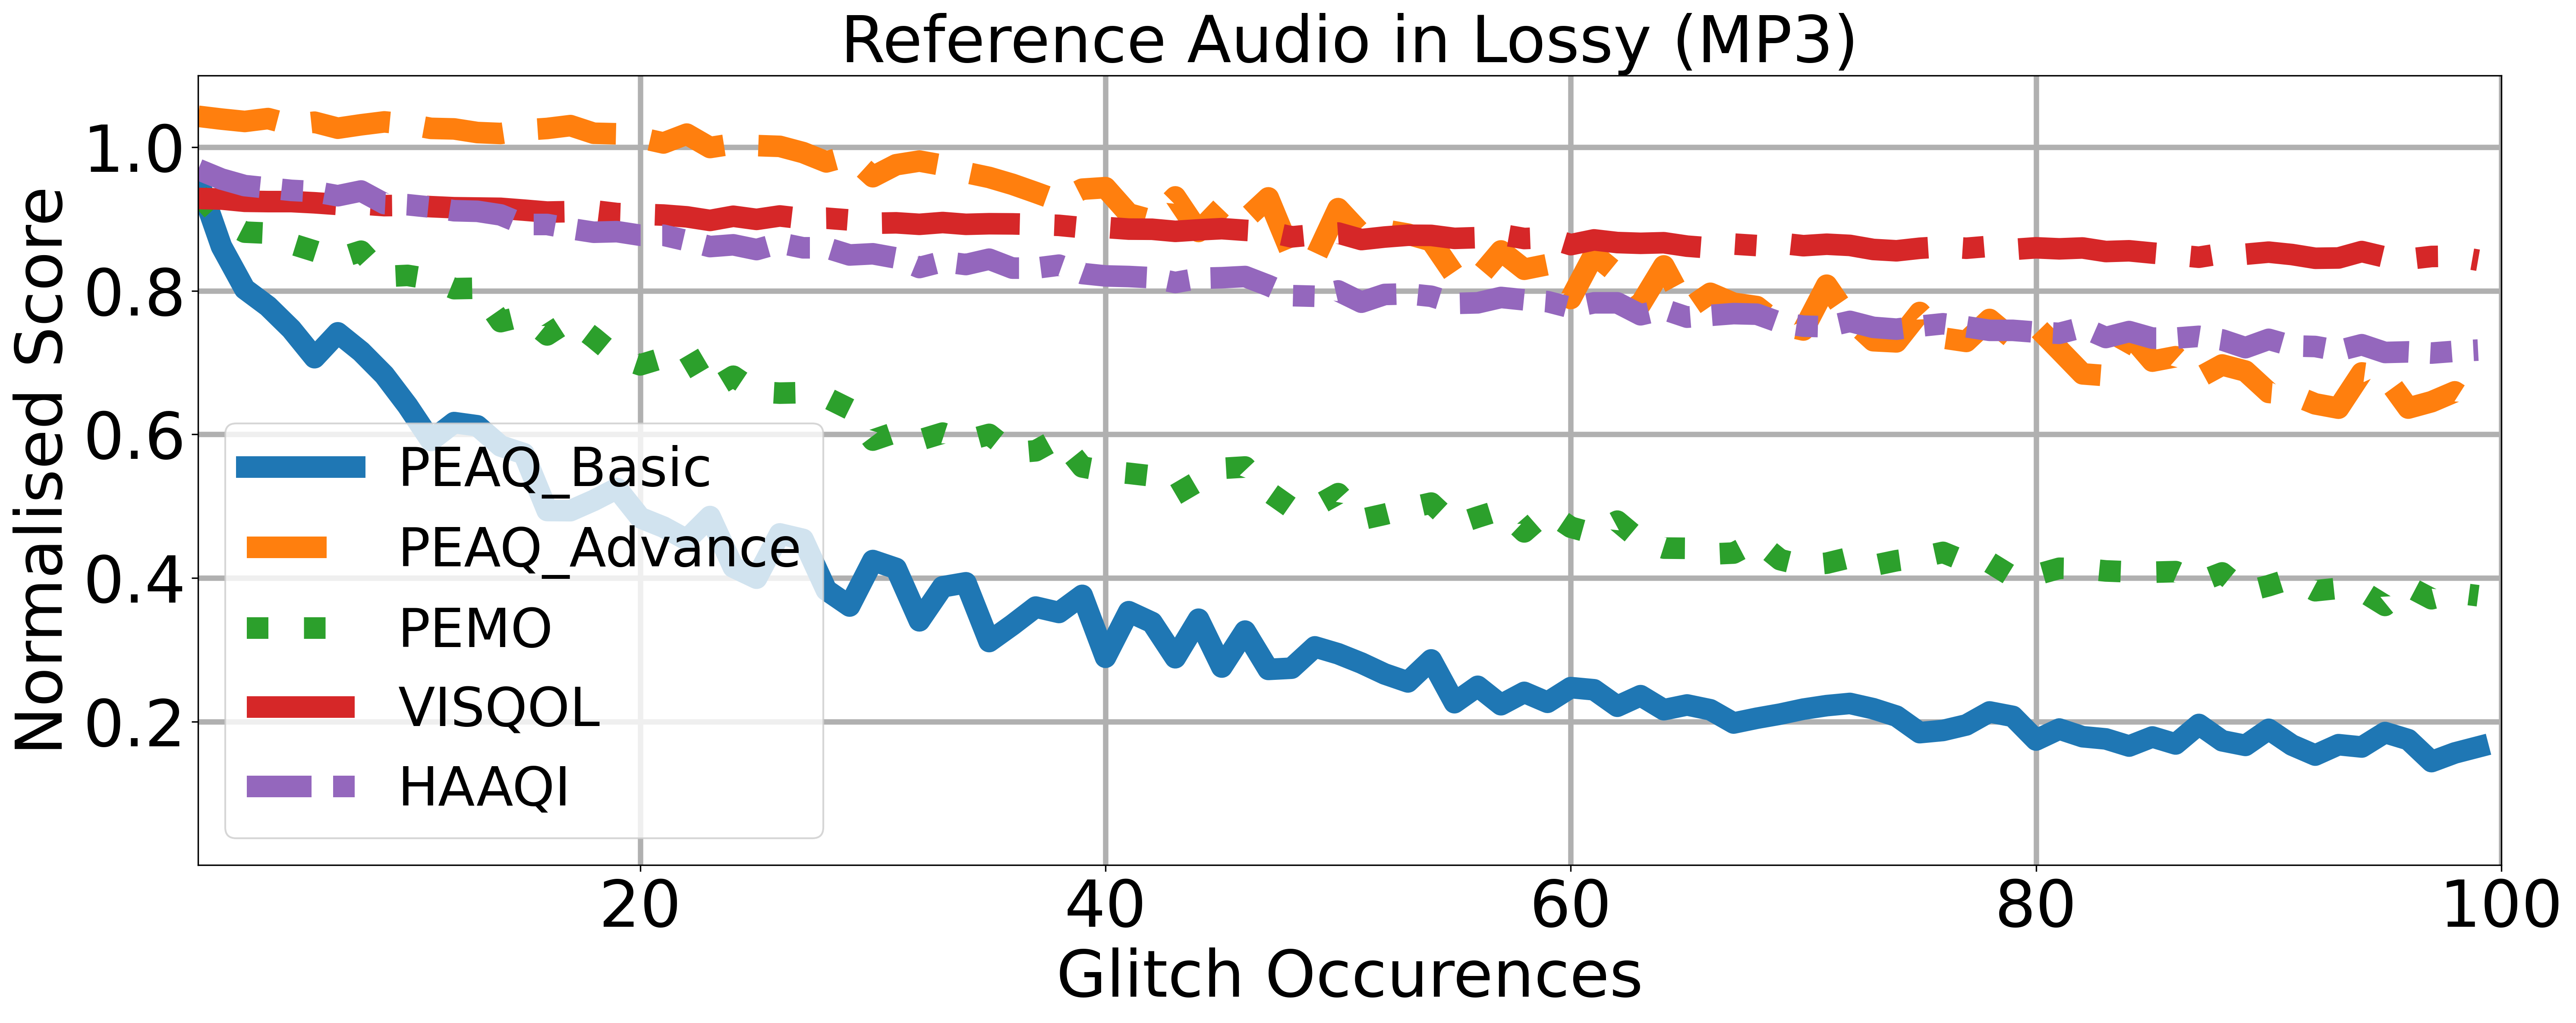

In [21]:
import matplotlib.pyplot as plt

# Assuming you already have:
#   group_mp3    – list of DataFrames for PEAQ Basic, PEAQ Advance, PEMO, ViSQOL, HAAQI (MP3)
#   metric_type  – ['PEAQ_Basic', 'PEAQ_Advance', 'PEMO', 'VISQOL', 'HAAQI']
#   line_styles  – ['-','--',':','-.',(0,(3,1,1,1))]

fig, ax = plt.subplots(figsize=(20, 8), dpi=300)

for df, label, style in zip(group_mp3, metric_type, line_styles):
    ax.plot(df['Dropout Num'],
            df['normalised_score'],
            linestyle=style,
            label=label,
            linewidth=12)

ax.set_title('Reference Audio in Lossy (MP3)', fontsize=36)
ax.set_xlabel('Glitch Occurences', fontsize=36)
ax.set_ylabel('Normalised Score', fontsize=36)
ax.set_xlim(1, 100)
ax.set_ylim(0, 1.1)
ax.set_yticks([0.2, 0.4, 0.6, 0.8, 1.0])
ax.tick_params(axis='both', labelsize=36)
ax.legend(fontsize=30)
ax.grid(True, linewidth=3)

plt.tight_layout()
plt.show()
